### VERİ TEMİZLEME

<bold>Bir sütunda karışık bir veri tipi var, o yüzden çıkabilecek hatalara karşı, `low_memory = False` attribute'unu kullandık</bold>

In [206]:
import numpy as np
import pandas as pd

df = pd.read_csv('./dataset_link_phishing.csv', low_memory=False)

In [207]:
df.head()

,Unnamed: 0,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,3,http://www.jp519.com/,21,13,0,2,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


<bold>Burada indexleri `unnamed: 0` denen sütuna yazıldığını görüyoruz, ancak pandas kendiliğinden indexlediği silebiliriz</bold>

In [208]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19426,http://www.fontspace.com/category/blackletter,45,17,1,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
19427,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
19428,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
19429,http://www.mypublicdomainpictures.com/,38,30,1,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


<bold>`domain_with_copyright` denen sütunda birbirinden farklı veri tipleri görüyoruz bunun için, tüm verileri sayısala dönüştürüyoruz</bold>

In [209]:
df["domain_with_copyright"] = list(map(lambda x : 1 if x == 'one' else 0 if x == 'zero' else 1 if x == 'One' else 0 if x == 'Zero' else x, df["domain_with_copyright"]))
df["domain_with_copyright"]=pd.to_numeric(df["domain_with_copyright"])
df["domain_with_copyright"]

0        1
1        0
2        0
3        1
4        0
        ..
19426    0
19427    0
19428    0
19429    0
19430    1
Name: domain_with_copyright, Length: 19431, dtype: int64

<bold>`status` sütunu etiket olarak kullanılacak, ve sayısal olması daha iyidir</bold>

In [210]:
df["status"] = list(map(lambda x: 1 if x == "legitimate" else 0 if x == "phishing" else x, df["status"]))
df["status"]

0        0
1        0
2        0
3        1
4        1
        ..
19426    1
19427    0
19428    1
19429    1
19430    0
Name: status, Length: 19431, dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         19431 non-null  object 
 1   url_length                  19431 non-null  int64  
 2   hostname_length             19431 non-null  int64  
 3   ip                          19431 non-null  int64  
 4   total_of.                   19431 non-null  int64  
 5   total_of-                   19431 non-null  int64  
 6   total_of@                   19431 non-null  int64  
 7   total_of?                   19431 non-null  int64  
 8   total_of&                   19431 non-null  int64  
 9   total_of=                   19431 non-null  int64  
 10  total_of_                   19431 non-null  int64  
 11  total_of~                   19431 non-null  int64  
 12  total_of%                   19431 non-null  int64  
 13  total_of/                   194

<bold>Gördüğümüz üzere herhangi bir null verimiz yoktur</bold>

In [212]:
df.isnull().sum()

url                0
url_length         0
hostname_length    0
ip                 0
total_of.          0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 86, dtype: int64

<bold>Burada herhangi bir anlam ifade etmediğinden tek değerli sütunlarımızı kaldırıyoruz</bold>

In [213]:
droppable = list(filter(lambda x: df[x].nunique() == 1, df.columns))
df.drop(droppable, axis='columns', inplace=True)
df.shape

(19431, 81)

### VERİ GÖRSELLEŞTİRME VE ANALİZİ

In [214]:
import matplotlib.pyplot as plt

<bold>Veri setimizdeki sitelerin dağılımını görelim:</bold>

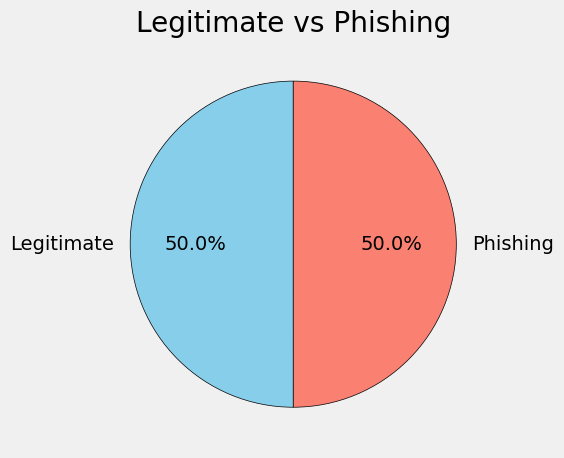

In [215]:
plt.style.use("fivethirtyeight")

status_1_counts = sum(df['status'] == 1)
status_0_counts = sum(df['status'] == 0)

slices = [status_1_counts, status_0_counts]
labels = ['Legitimate', 'Phishing']
color=['skyblue', 'salmon']

plt.pie(slices, labels=labels, startangle=90, autopct='%1.1f%%', colors=color,
       wedgeprops={'edgecolor':'black'})

plt.title('Legitimate vs Phishing')
plt.tight_layout() #subplotların arasındaki boşluğu ayarlayarak grafiği daha düzenli ve okunabilir hale getirir.
plt.show()

<bold>Sahte web siteleri genellikle uzun ve karmaşık URL'lere sahip olabilirken, gerçek web siteleri daha kısa ve açıklayıcı URL'lere sahip olabilir. Bu nedenle, bu görselleştirme, URL uzunluğu ile URL arasındaki ilişkiyi inceleyerek sahte web sitelerini belirleme sürecine katkıda bulunabilir.</bold>

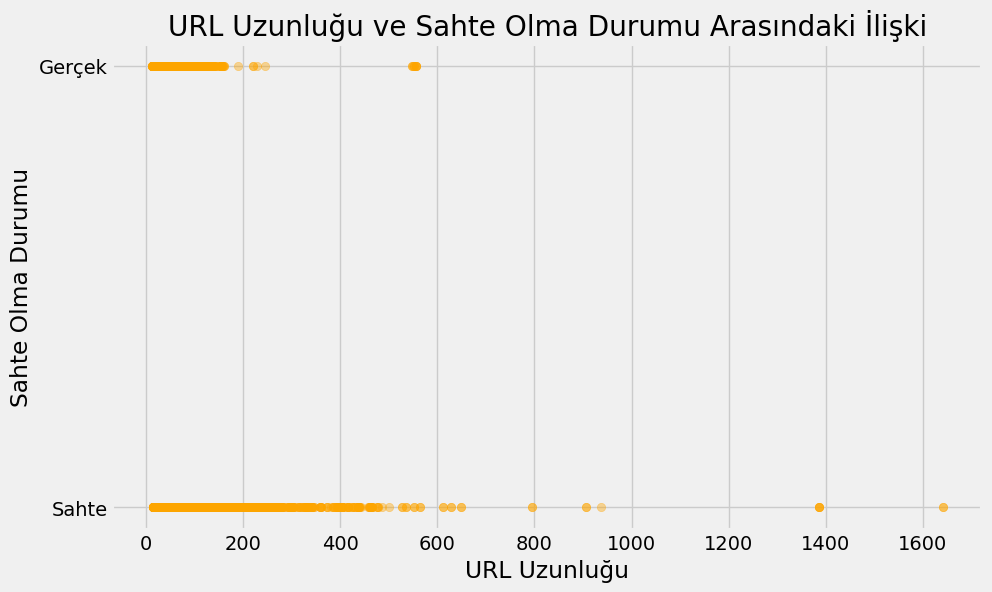

In [216]:
url_length = df['url_length']
status = df['status']

plt.figure(figsize=(10, 6))
plt.scatter(url_length, status, alpha=0.4, color = ['orange'])

plt.xlabel('URL Uzunluğu')
plt.ylabel('Sahte Olma Durumu')
plt.title('URL Uzunluğu ve Sahte Olma Durumu Arasındaki İlişki')
plt.yticks([0, 1], ['Sahte', 'Gerçek'])

plt.grid(True)
plt.show()

<bold>URL uzunluğu ve hostname uzunluğu arasında bir ilişki var mı?
Daha uzun URL'ler, genellikle daha uzun hostname'lere sahip mi?
Belirli bir URL uzunluğuna sahip olan web siteleri, genellikle belirli bir hostname uzunluğuna sahip midir? gibi sorulara cevap arayalım. </bold>

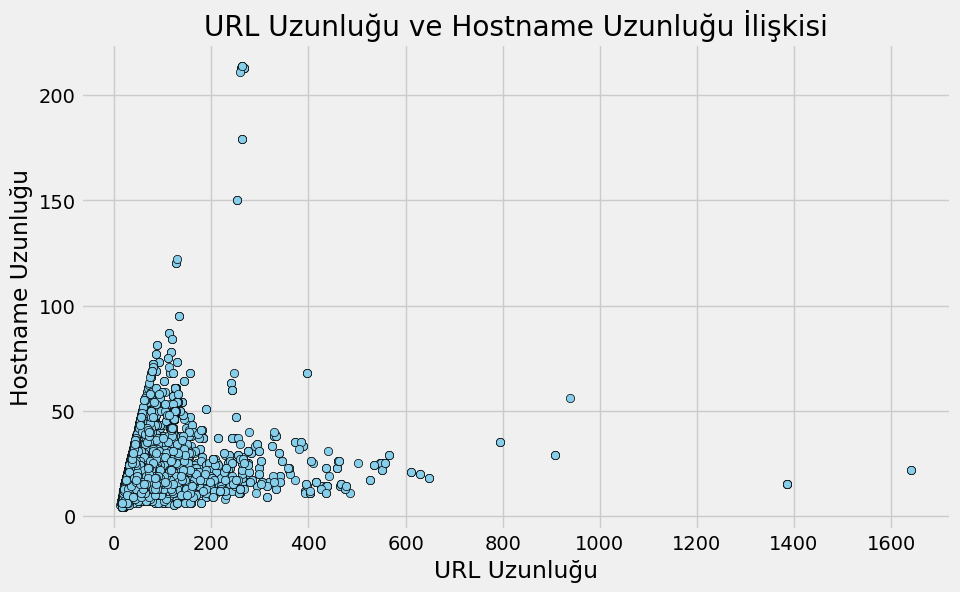

In [217]:
plt.figure(figsize=(10, 6))
plt.scatter(df['url_length'], df['hostname_length'], color = 'skyblue', edgecolor = 'black')

plt.xlabel('URL Uzunluğu')
plt.ylabel('Hostname Uzunluğu')
plt.title('URL Uzunluğu ve Hostname Uzunluğu İlişkisi')

plt.grid(True)
plt.show()

<bold>web trafik: web sitesindeki ziyaret sayısı                                                             
URL uzunluğu: URL'nin karakter sayısı                                                                       
Genelikle kötü niyetli web siteler uzun url kullanır bu yüzden bu grafiğe baktığımzda url'si kısa olan web siteler kullancılar tarafından ziyaret sayısı daha fazla oluyor.</bold>

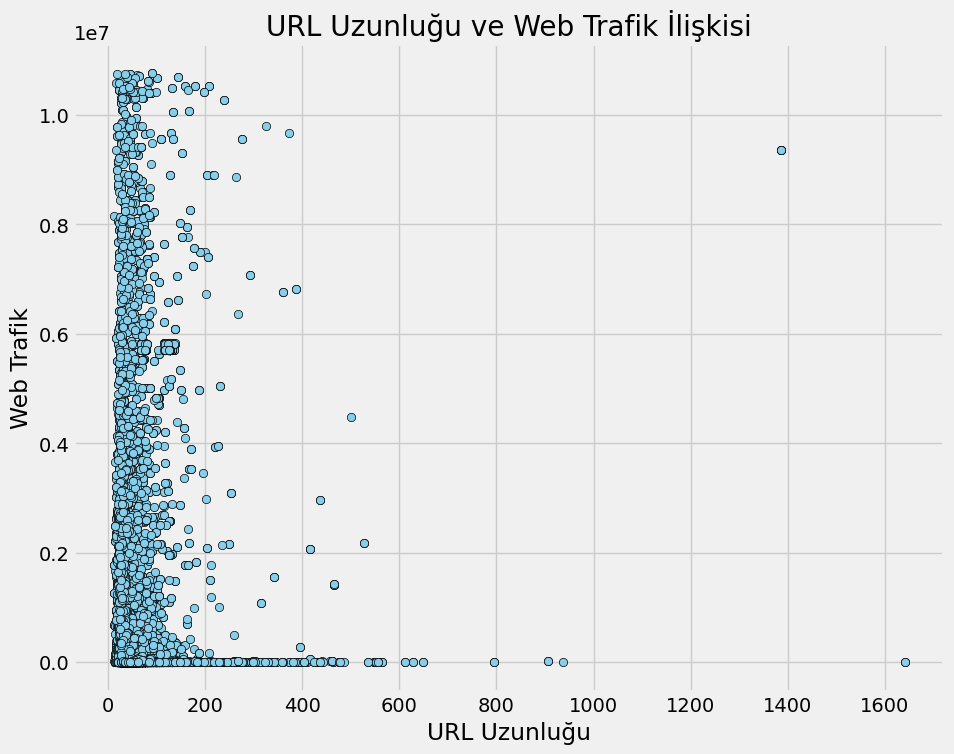

In [218]:
plt.figure(figsize=(10,8))
plt.scatter(df['url_length'], df['web_traffic'], color='skyblue', edgecolor='black')
plt.title('URL Uzunluğu ve Web Trafik İlişkisi')
plt.xlabel('URL Uzunluğu')
plt.ylabel('Web Trafik')
plt.grid(True)
plt.show()

<bold>web_traffice değerleri belirli aralıklara bölünmüş ve her bir aralıktaki web sitesi sayısı çubuk yüksekliği ile gösterilmiştir. Örneğin, eğer grafikte belirli bir aralıktaki çubuklar diğerlerinden daha yüksekse, bu, o aralıktaki web sitelerinin daha fazla olduğunu ve bu aralıktaki web trafiğinin daha yoğun olduğunu gösterir. Yani histogramın sol tarafındaki daha yüksek sütunlar, daha düşük web trafiğine sahip web sitelerinin daha fazla olduğunu gösteriyor.</bold>

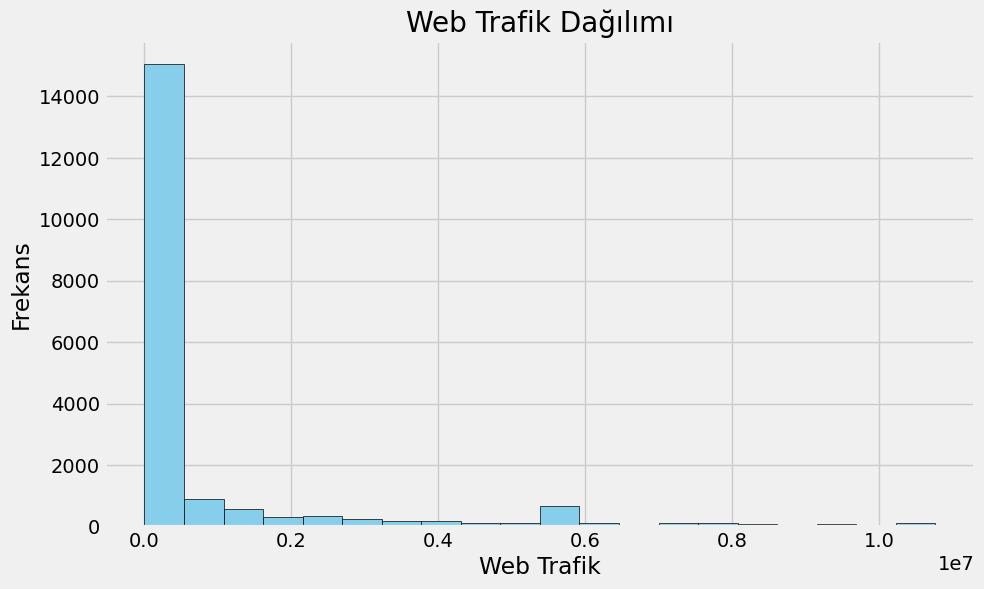

In [219]:
plt.figure(figsize=(10, 6))

plt.hist(df['web_traffic'], bins=20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Web Trafik')
plt.ylabel('Frekans')

plt.title('Web Trafik Dağılımı')
plt.show()

<bold>Harici CSS dosyalarının sayısı bir web sitesinin karmaşıklığını ve tasarımını yansıtabilir sahte web siteleri bazı durumlarda sahte web siteleri kullanıcıları yanıltmak veya zararlı içerikler sunmak amacıyla harici CSS dosyalarını manipüle edebilir ve CSS sayısı artırabilirler bu grafikte sahte webler css dosyaları fazla olduğunu görüyoruz.</bold>

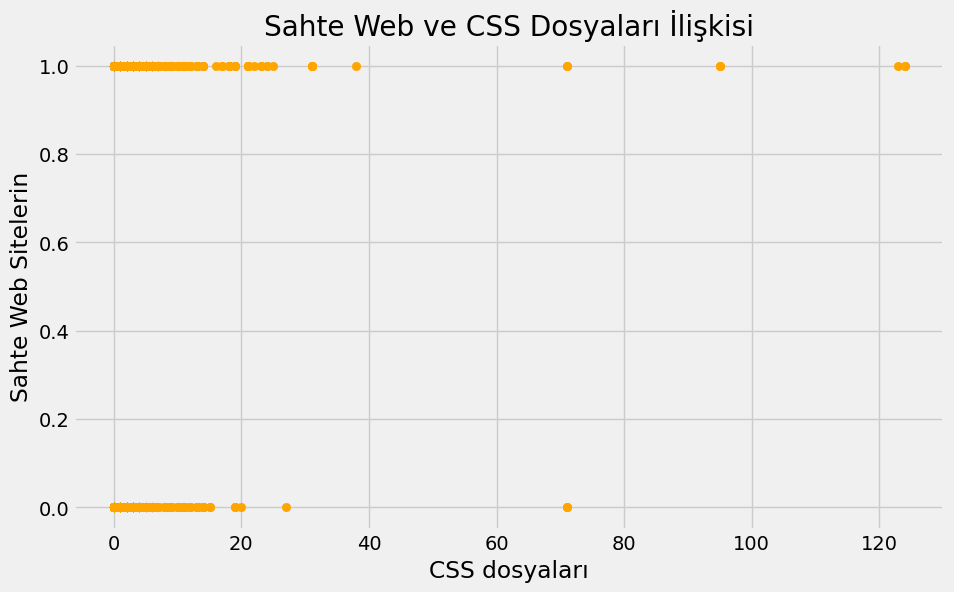

In [220]:
plt.figure(figsize=(10,6))
plt.scatter(df['nb_extCSS'],df['status'], color='orange')


plt.xlabel('CSS dosyaları')
plt.ylabel('Sahte Web Sitelerin')
plt.title('Sahte Web ve CSS Dosyaları İlişkisi')
plt.grid(True)
plt.show()

<bold>Aşağıdaki grafiğe bakarak genelikle Phishing işareti olmayan siteler sahte olduğunu görürüz.</bold>

<Figure size 1000x600 with 0 Axes>

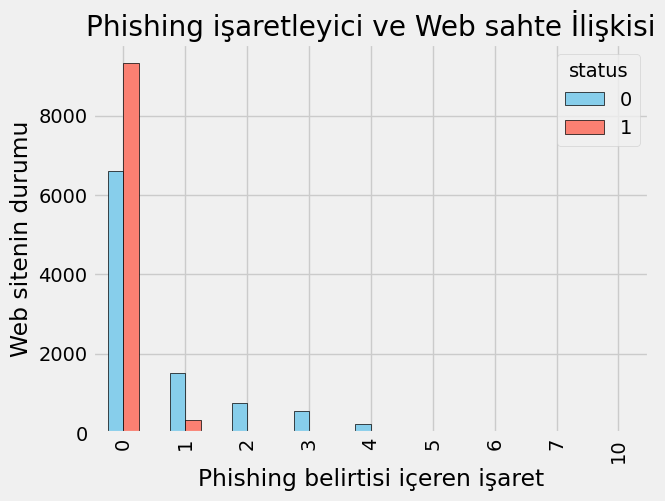

In [221]:
plt.figure(figsize=(10,6))
colors = ['skyblue', 'salmon']

n=pd.crosstab(df['phish_hints'], df['status'])
n.plot(kind='bar', color=colors, edgecolor = 'black')

plt.title('Phishing işaretleyici ve Web sahte İlişkisi')
plt.xlabel("Phishing belirtisi içeren işaret")
plt.ylabel("Web sitenin durumu")
plt.grid(True)
plt.show()

<bold>Şimdi ise web trafiği ile sahte olma durumu arasındaki ilşkiye bakalım.</bold>

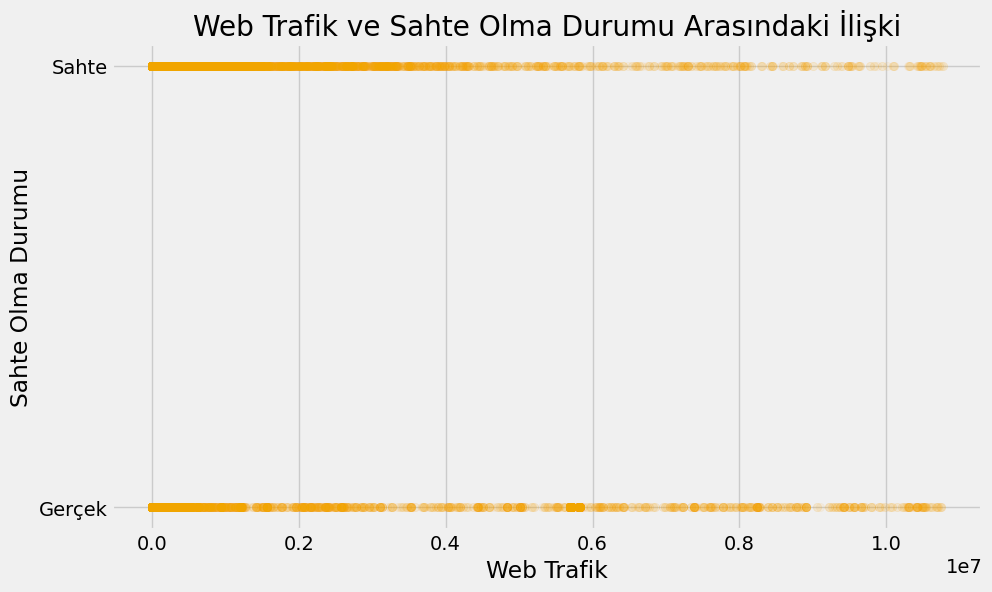

In [222]:
plt.figure(figsize=(10, 6))
plt.scatter(df['web_traffic'], df['status'], alpha=0.07, color = 'orange')

plt.xlabel('Web Trafik')
plt.ylabel('Sahte Olma Durumu')
plt.title('Web Trafik ve Sahte Olma Durumu Arasındaki İlişki')
plt.yticks([0, 1], ['Gerçek', 'Sahte'])

plt.grid(True)
plt.show()

<bold>Sahte ve gerçek web sitelerinin web trafiği genellikle farklı aralıklarda dağılmıştır. Ancak, web trafiği miktarıyla sahte olma durumu arasında net bir ilişki görülmüyor.</bold>

<bold>Aşağıdaki grafikte analiz yaptığımızda medya sayısı fazla olan siteler genelikle sahte olduğunu görüyoruz.</bold>

<Figure size 1000x800 with 0 Axes>

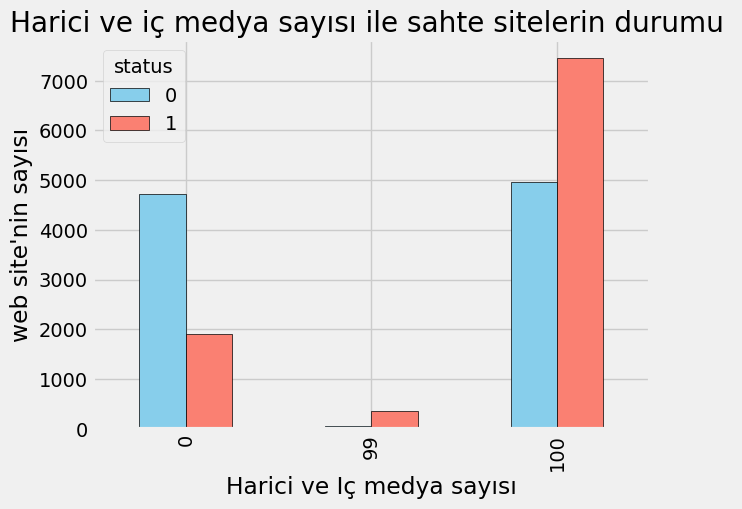

In [223]:
plt.figure(figsize=(10,8))
df['sum_all']=df['ratio_extMedia']+df['ratio_intMedia']
m=df['sum_all'].astype(int)
n=pd.crosstab(m,df['status'])
colors = ['skyblue', 'salmon']
n.plot(kind='bar', color=colors, edgecolor = 'black')

plt.title('Harici ve iç medya sayısı ile sahte sitelerin durumu ')
plt.xlabel('Harici ve Iç medya sayısı')
plt.ylabel("web site'nin sayısı")
plt.grid(True)
plt.show()

<bold>Burda baktığımızda iç ve dış yönlendirmesi olamayan fazla olan sitelerin genelikle sahte olduğunuz görüyoruz.</bold>

<Figure size 1000x800 with 0 Axes>

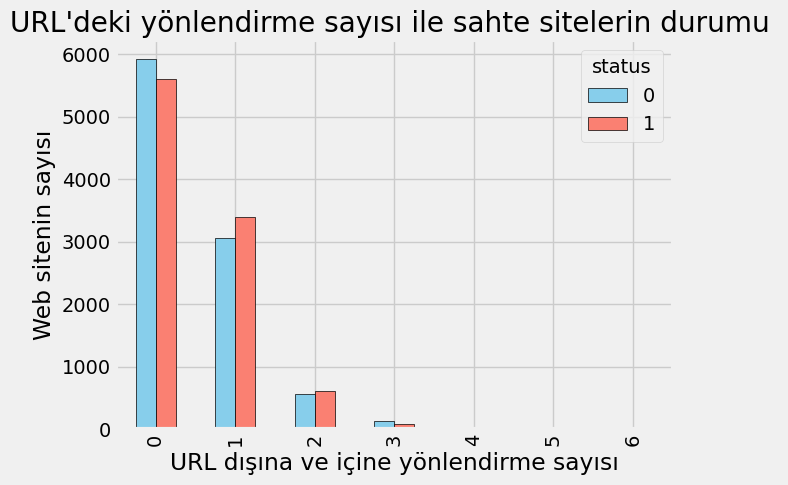

In [224]:
plt.figure(figsize=(10,8))
df['sum']=df['nb_redirection']+df['nb_external_redirection']
m=df['sum'].astype(int)
n=pd.crosstab( m ,df['status'])
colors = ['skyblue', 'salmon']
n.plot(kind='bar', color=colors, edgecolor = 'black')

plt.xlabel('URL dışına ve içine yönlendirme sayısı')
plt.ylabel('Web sitenin sayısı')
plt.title('URL\'deki yönlendirme sayısı ile sahte sitelerin durumu ')
plt.grid(True)
plt.show()

<bold>Aşağıdaki grafikte giriş formlar ile phishing işaretleri arasındaki ilişki şöyle ilişkilendirebiliriz phishing işaretleri azaldığında giriş formda "HAYIR" sayısı artar ve böylece kullancıların hassas bilgileri girmezler.</bold>

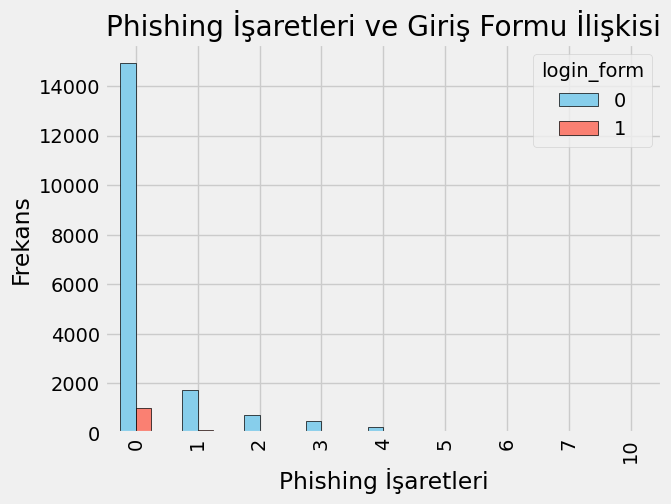

In [225]:
phishing_isretleri = pd.crosstab(df['phish_hints'], df['login_form'])

colors = ['skyblue', 'salmon']
phishing_isretleri.plot(kind='bar', color=colors, edgecolor = 'black')

plt.xlabel('Phishing İşaretleri')
plt.ylabel('Frekans')
plt.title('Phishing İşaretleri ve Giriş Formu İlişkisi')

plt.grid(True)
plt.show()

<bold>Aşağıdaki grafikte analiz yaptığımızda grafik, Google tarafından dizinlenmiş sitelerin büyük çoğunluğunun geçerli olduğunu ve dizinlenmemiş sitelerin büyük çoğunluğunun sahte olduğunu göstermektedir. Bu, Google’ın dizinleme algoritmasının güvenilir siteleri önceliklendirdiğini ve sahte siteleri etkili bir şekilde ele aldığını göstermektedir.</bold>

<Figure size 1000x600 with 0 Axes>

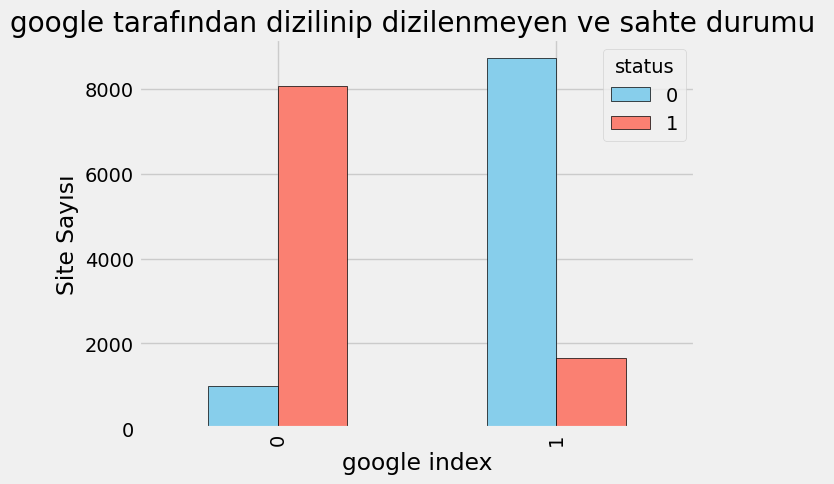

In [226]:
plt.figure(figsize=(10,6))
n=pd.crosstab(df['google_index'],df['status'])
colors = ['skyblue', 'salmon']
n.plot(kind='bar', color=colors, edgecolor = 'black')

plt.xlabel('google index')
plt.ylabel('Site Sayısı')
plt.title('google tarafından dizilinip dizilenmeyen ve sahte durumu ')
plt.grid(True)
plt.show()

<bold>Aşağıdaki grafik, gerçek web sitelerinin daha yüksek ortalama web trafiğine sahip olmduğunu bize gösteriyor.</bold>

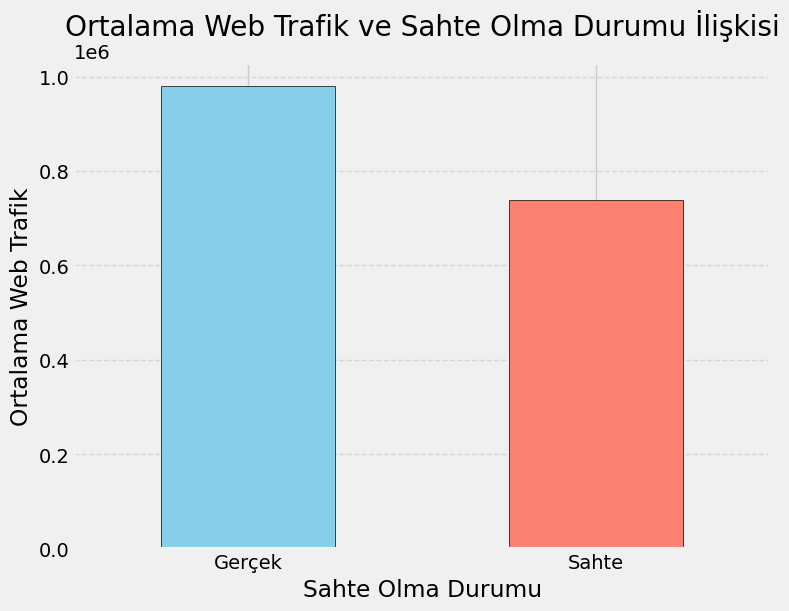

In [227]:
mean_web_traffic_status = df.groupby('status')['web_traffic'].mean()

plt.figure(figsize=(8, 6))

mean_web_traffic_status.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor = 'black')

plt.xlabel('Sahte Olma Durumu')
plt.ylabel('Ortalama Web Trafik')
plt.title('Ortalama Web Trafik ve Sahte Olma Durumu İlişkisi')
plt.xticks(np.arange(2), ['Gerçek', 'Sahte'], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<bold>Sahte ve gerçek web sitelerinin toplam web trafiğindeki yüzdesini görelim. Yani bu pasta grafiği bize toplam web trafiğindeki sahte ve gerçek web sitelerinin oransal olarak ne kadar paya sahip olduğunu gösterir.</bold>

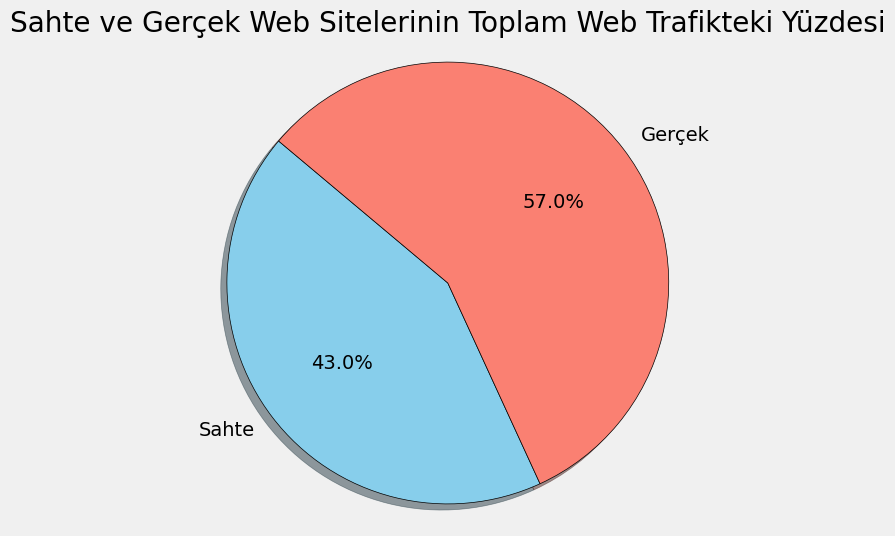

In [228]:
plt.style.use("fivethirtyeight")

total_web_traffic = df['web_traffic'].sum()

total_fake_web_traffic = df[df['status'] == 1]['web_traffic'].sum()
total_legit_web_traffic = df[df['status'] == 0]['web_traffic'].sum()

percent_fake_web_traffic = (total_fake_web_traffic / total_web_traffic) * 100
percent_legit_web_traffic = (total_legit_web_traffic / total_web_traffic) * 100

labels = ['Sahte', 'Gerçek']
sizes = [percent_fake_web_traffic, percent_legit_web_traffic]
colors=['skyblue', 'salmon']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True,
       wedgeprops={'edgecolor':'black'})

plt.axis('equal')
plt.title('Sahte ve Gerçek Web Sitelerinin Toplam Web Trafikteki Yüzdesi')
plt.show()

<bold></bold>

<bold>Domain'in yaş dağılımını inceleyelim.</bold>

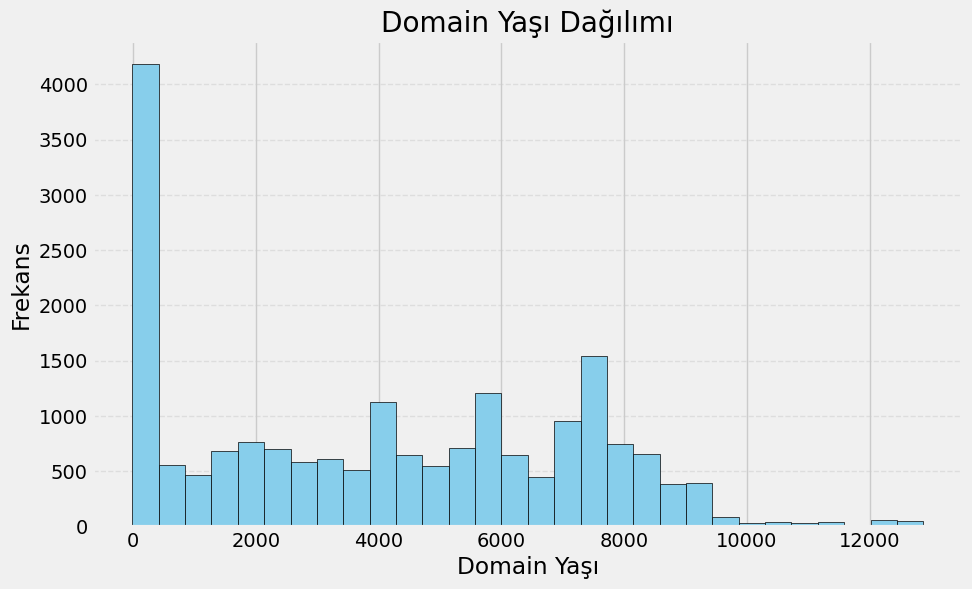

In [229]:
plt.figure(figsize=(10, 6))
plt.hist(df['domain_age'], bins=30, color = 'skyblue', edgecolor='black')

plt.xlabel('Domain Yaşı')
plt.ylabel('Frekans')
plt.title('Domain Yaşı Dağılımı')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

 <bold>Sonuç olarak bu, veri setindeki en yaşlı domainin yaklaşık 4000 yaşında olduğunu gösterir. Domainlerin yaş dağılımı genellikle yeni domainlerin daha yaygın olduğunu gösteriyor. Daha eski domainlere sahip web siteleri nadiren bulunuyor ancak bu siteler genellikle daha köklü olabilir.</bold>

<bold>Aşağıdaki boxplot, domain yaşının sahtelik durumuyla ilişkisini gösteriyor. Gördüğümüz kadarıyla, sahte web sitelerinin genellikle daha kısa bir domain yaşına sahip olduğunu söyleyebiliriz çünkü kutunun alt kısmı daha kısa ve median değeri daha düşüktür. Gerçek web siteleri için ise domain yaşlarının dağılımı daha yaygındır ve median değeri daha yüksektir.</bold>

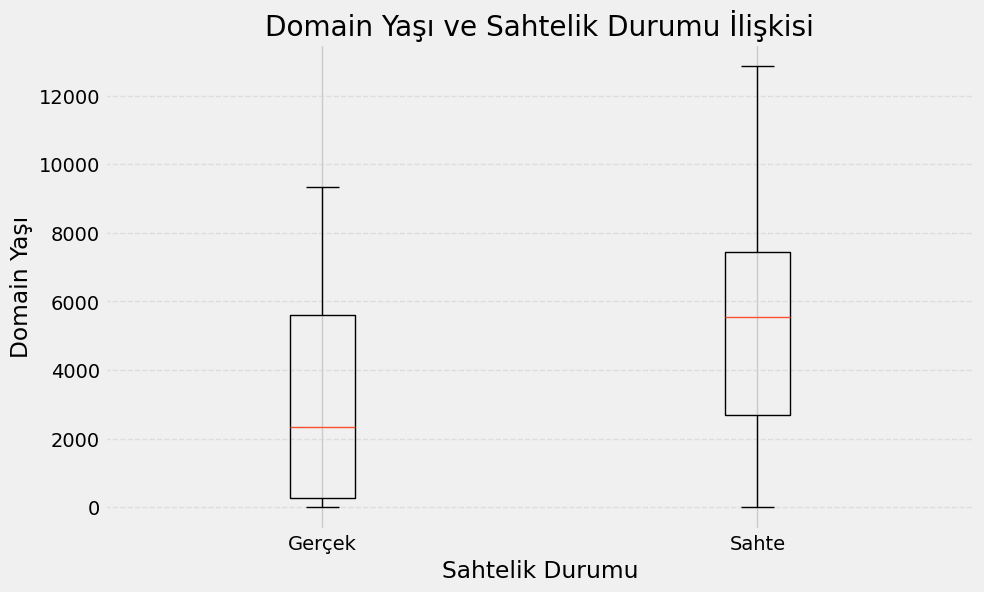

In [230]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['status'] == 0]['domain_age'], df[df['status'] == 1]['domain_age']], labels=['Gerçek', 'Sahte'])

plt.xlabel('Sahtelik Durumu')
plt.ylabel('Domain Yaşı')
plt.title('Domain Yaşı ve Sahtelik Durumu İlişkisi')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<bold>Önce veri setimizdeki sadece sayısal verileri içeren sütunları seçelim. Sonra bu sayısal değişkenlerimizi birbirleri arasına korelasyon matrisi atanıyor. Daha sonra 'status' değişkeni ile en yüksek korelasyona sahip olan ilk 10 özelliği alıyoruz. Ve son olarak en yüksek korelasyona sahip olan değişkenler arasındaki korelasyon matrisini oluşturuyoruz:</bold>

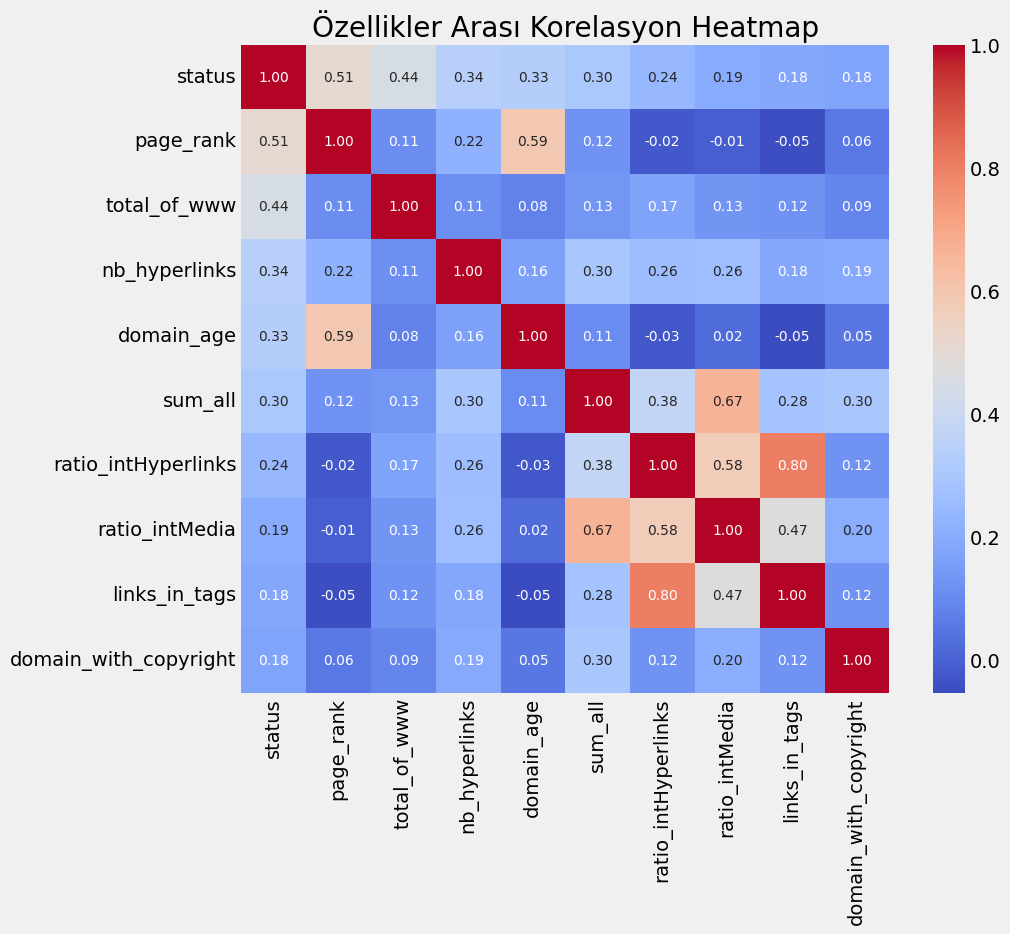

In [231]:
import seaborn as sns

numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix_all = numerical_features.corr()
top_correlated_features = correlation_matrix_all['status'].sort_values(ascending=False).index[:10]
correlation_matrix_top = correlation_matrix_all.loc[top_correlated_features, top_correlated_features]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, square=True)
plt.title('Özellikler Arası Korelasyon Heatmap')
plt.show()

<bold>Genel olarak bakacak olursak:</bold>

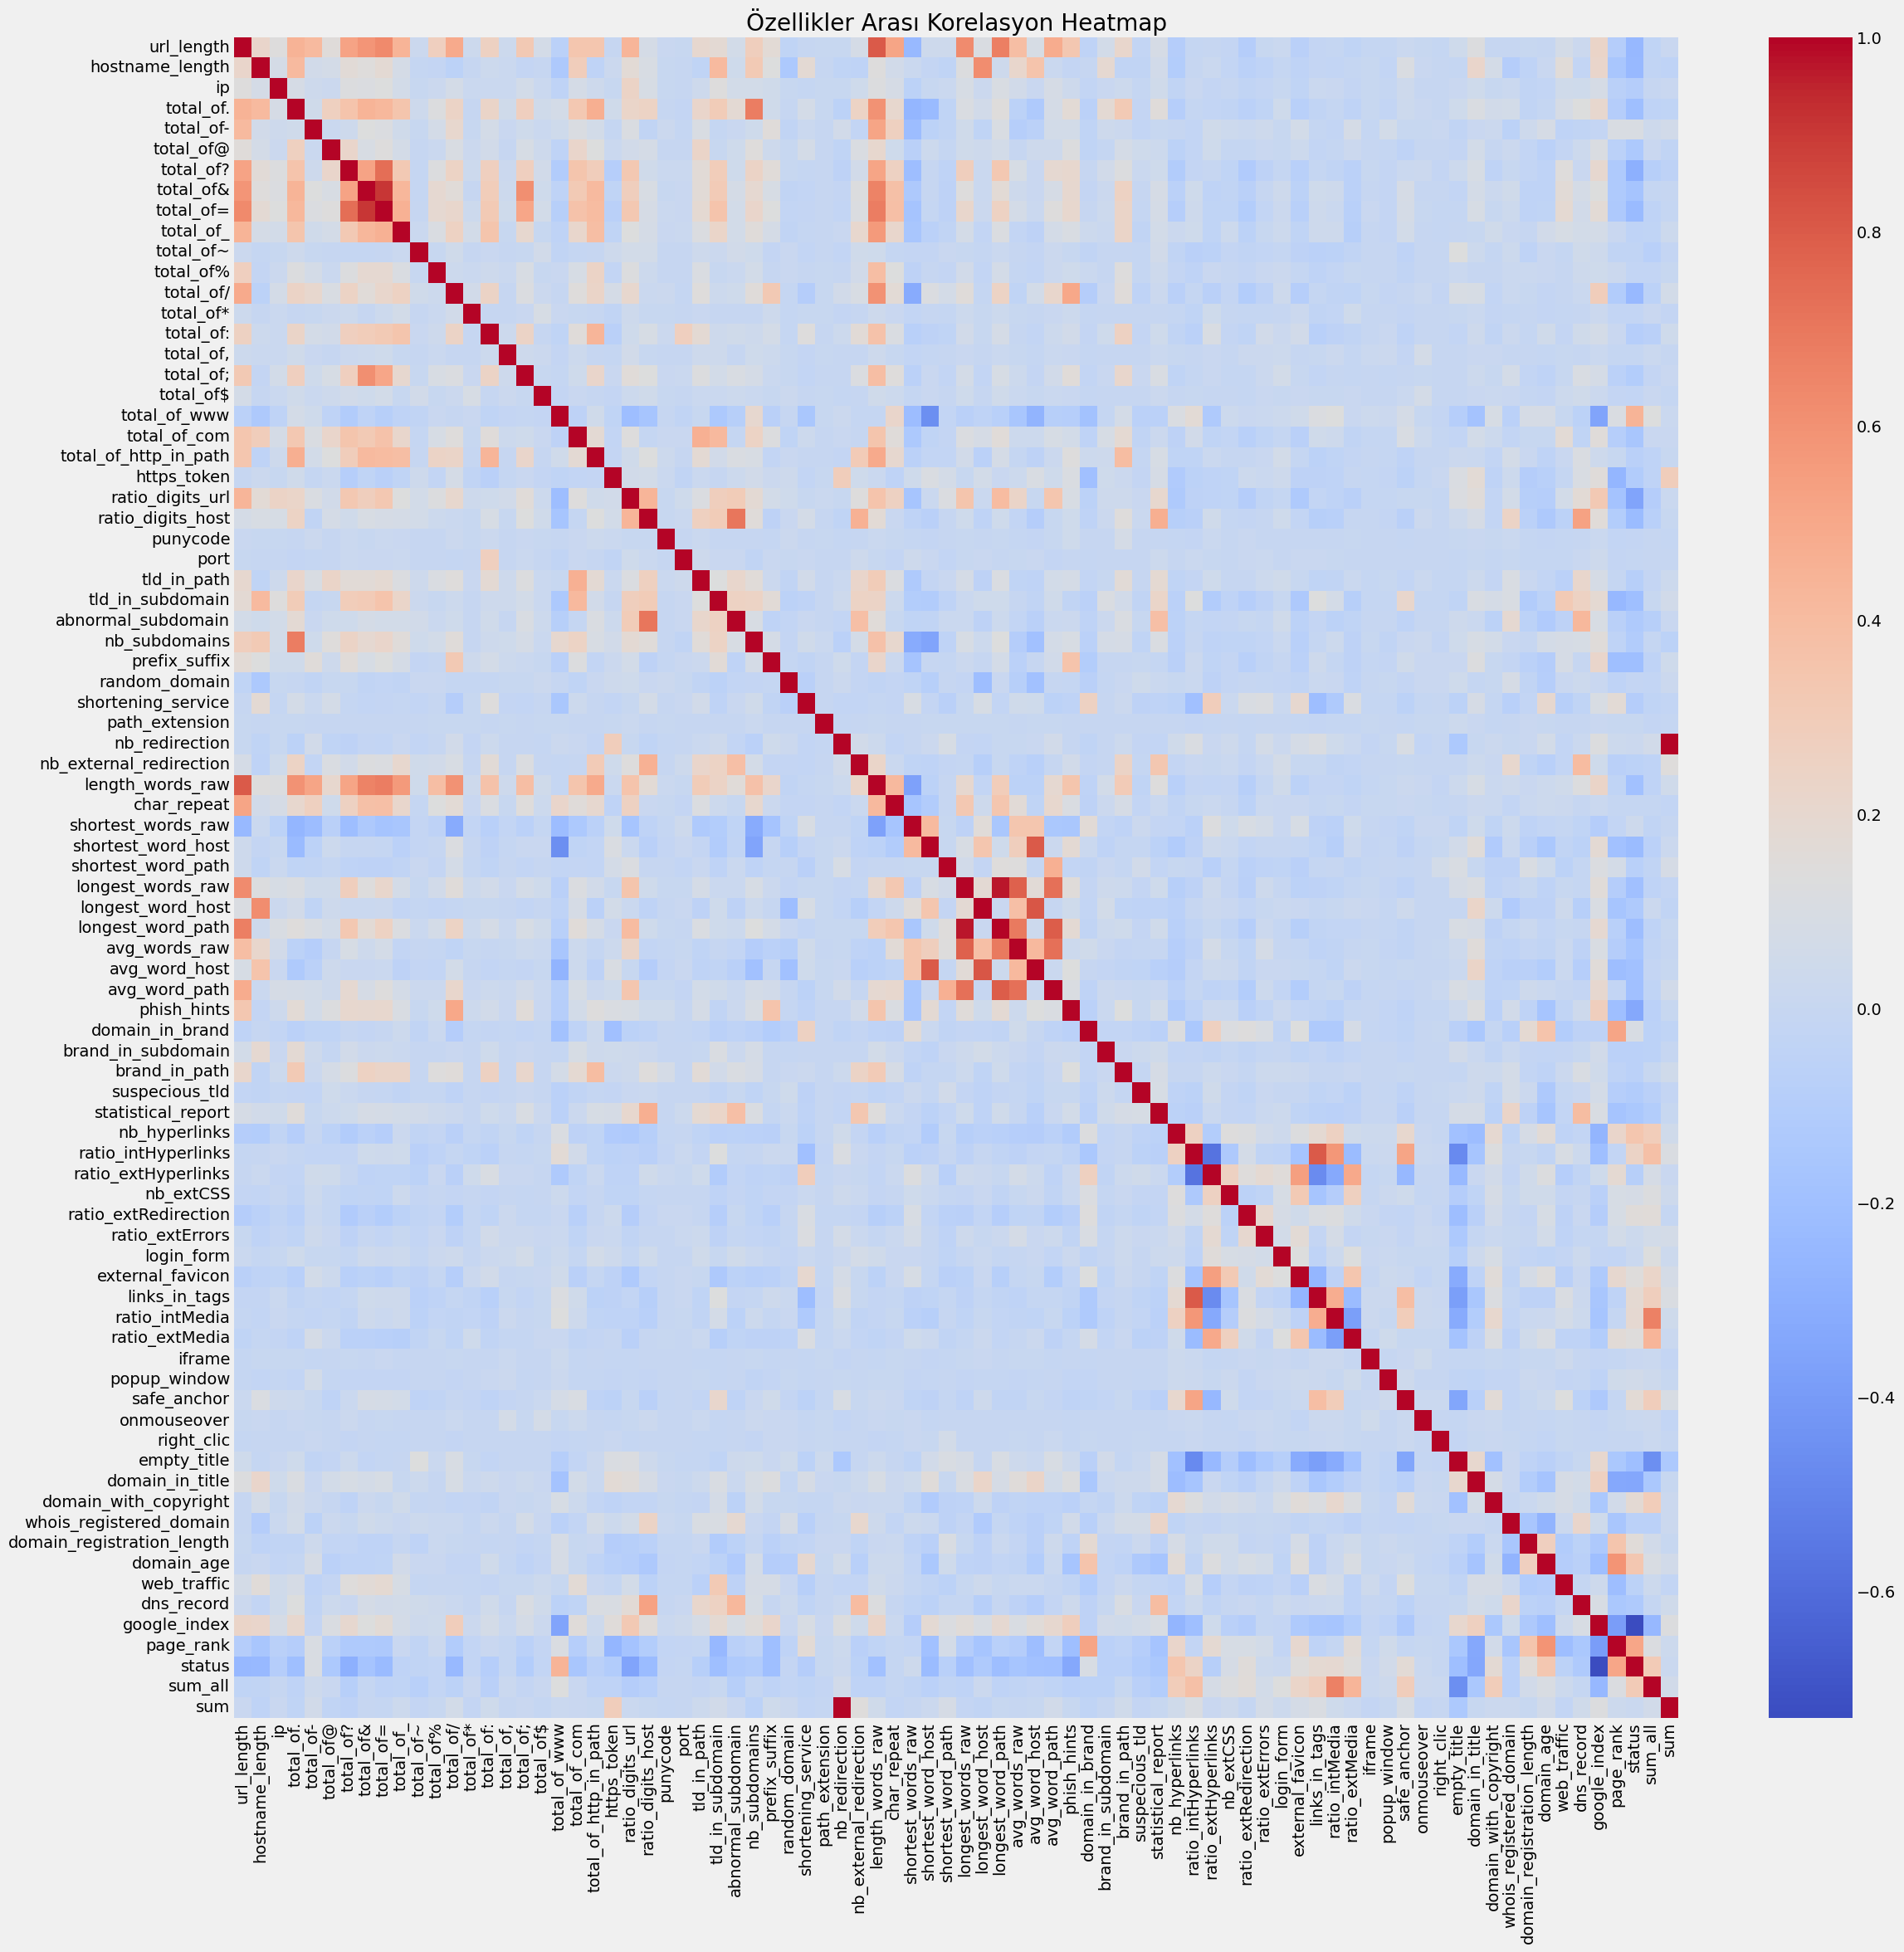

In [232]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f",)
plt.title('Özellikler Arası Korelasyon Heatmap')
plt.show()

##### Bazı Pozitif Korelasyonlar
<bold>
    
•"total_of_www" ve "total of?" özellikleri arasındaki korelasyon katsayısı 0.8'dir. Bu, iki özellik arasında güçlü bir pozitif korelasyon olduğunu gösterir. Yani, bir web sayfasında "total_of_www" değeri ne kadar yüksekse, "total of?" değeri de o kadar yüksektir.

•total of? ve total of~ (0.7): Bu da iki özellik arasında güçlü bir pozitif korelasyon olduğunu gösterir. Yani, bir web sayfasında "total of?" değeri ne kadar yüksekse, "total of~" değeri de o kadar yüksektir.

•total of? ve total of: (0.7): Bu da iki özellik arasında güçlü bir pozitif korelasyon olduğunu gösterir. Yani, bir web sayfasında "total of?" değeri ne kadar yüksekse, "total of" değeri de o kadar yüksektir.

•total of? ve total of; (0.6): Bu da iki özellik arasında güçlü bir pozitif korelasyon olduğunu gösterir. Yani, bir web sayfasında "total of?" değeri ne kadar yüksekse, "total of;" değeri de o kadar yüksektir.

•ratio_digits_url ve punycode (0.4): Bu da iki özellik arasında güçlü bir pozitif korelasyon olduğunu gösterir. Yani, bir web sayfasında "ratio_digits_url" değeri ne kadar yüksekse, "punycode" değeri de o kadar yüksektir.
</bold>

##### Bazı Negatif Korelasyonlar
<bold>
    
•ratio_intHyperlinks ve nb extCSS (-0.4): Bu, iki özellik arasında güçlü bir negatif korelasyon olduğunu gösterir. Yani, bir web sayfasında "ratio_intHyperlinks" değeri ne kadar yüksekse, "nb extCSS" değeri o kadar düşüktür.

•ratio_intHyperlinks ve ratio extErrors (-0.4): Bu da iki özellik arasında güçlü bir negatif korelasyon olduğunu gösterir. Yani, bir web sayfasında "ratio_intHyperlinks" değeri ne kadar yüksekse, "ratio extErrors" değeri o kadar düşüktür.

•ratio_intHyperlinks ve external favicon (-0.4): Bu da iki özellik arasında güçlü bir negatif korelasyon olduğunu gösterir. Yani, bir web sayfasında "ratio_intHyperlinks" değeri ne kadar yüksekse, "external favicon" değeri o kadar düşüktür.

•ratio_intMedia ve iframe (-0.4): Bu da iki özellik arasında güçlü bir negatif korelasyon olduğunu gösterir. Yani, bir web sayfasında "ratio_intMedia" değeri ne kadar yüksekse, "iframe" değeri o kadar düşüktür.

•ratio_intMedia ve safe anchor (-0.4): Bu da iki özellik arasında güçlü bir negatif korelasyon olduğunu gösterir. Yani, bir web sayfasında "ratio_intMedia" değeri ne kadar yüksekse, "safe anchor" değeri o kadar düşüktür.
</bold>

### MAKİNE ÖĞRENME MODELİ

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [234]:
x=df.drop(columns=['status','url'] ,axis=1)
y=df['status']

In [235]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [236]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [237]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

In [238]:
best_model_name = None
best_scaler_name = None
best_accuracy = 0
best_selected_features = None


In [239]:
for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    print(f'Model: {model_name}')
    print(f'Test Accuracy: {accuracy:.4f}\n')

Model: Logistic Regression
Test Accuracy: 0.9442

Model: Random Forest
Test Accuracy: 0.9918

Model: KNN
Test Accuracy: 0.9547

Model: SVC
Test Accuracy: 0.9671



In [246]:
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    step=5,  
    cv=StratifiedKFold(5, random_state=10, shuffle=True),  
    scoring='accuracy',
    n_jobs=-1,
)

In [247]:
rfecv.fit(xtrain, ytrain)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
      estimator=RandomForestClassifier(), n_jobs=-1, scoring='accuracy',
      step=5)

In [248]:
selected_features =rfecv.get_support()
selected_features = x.columns[rfecv.support_]

In [249]:
selected_features

Index(['url_length', 'hostname_length', 'total_of.', 'total_of-', 'total_of?',
       'total_of=', 'total_of_', 'total_of%', 'total_of/', 'total_of_www',
       'https_token', 'ratio_digits_url', 'ratio_digits_host', 'nb_subdomains',
       'prefix_suffix', 'shortening_service', 'nb_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors',
       'external_favicon', 'links_in_tags', 'ratio_intMedia', 'ratio_extMedia',
       'safe_anchor', 'empty_title', 'domain_in_title',
       'domain_with_copyright', 'domain_registration_length', 'domain_age',
       'web_traffic', 'google_index', 'page_rank', 'sum_all', 'sum'],
      dtyp

In [250]:
x_selected = x_scaled[selected_features]

In [251]:
sf=pd.DataFrame(selected_features)
sf

,0
0,url_length
1,hostname_length
2,total_of.
3,total_of-
4,total_of?
5,total_of=
6,total_of_
7,total_of%
8,total_of/
9,total_of_www


In [252]:
x_train_selected, x_test_selected, ytrain, ytest = train_test_split(x_selected, y, test_size=0.2, random_state=42)

In [253]:
model = RandomForestClassifier()
model.fit(x_train_selected, ytrain)
y_pred = model.predict(x_test_selected)
accuracy = accuracy_score(ytest, y_pred)

In [254]:
print('Random forest:')
print(f'Test Accuracy: {accuracy:.4f}\n')

Random forest:
Test Accuracy: 0.9913



In [255]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1972
           1       0.99      0.99      0.99      1915

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887



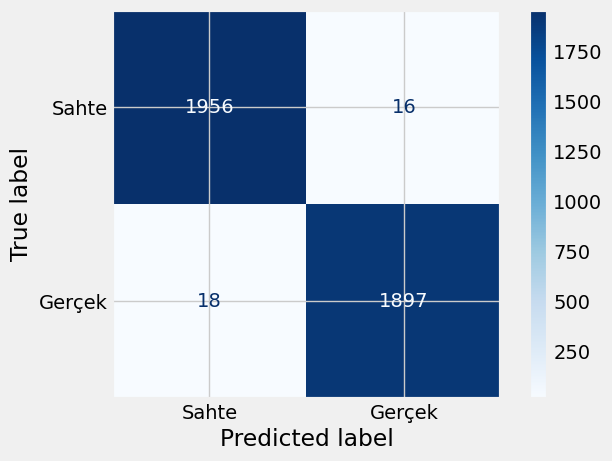

In [256]:
matrix = confusion_matrix(ytest,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [257]:
from sklearn.model_selection import cross_val_score

# Example with 5-fold cross-validation
cv_scores = cross_val_score(model, x_selected, y, cv=5, scoring='f1')
print(f'Cross-validated F1 scores: {cv_scores}')
print(f'Mean F1 score: {cv_scores.mean()}')

Cross-validated F1 scores: [1.         1.         0.98969603 0.98765432 0.98944115]
Mean F1 score: 0.9933583015414902


C:\Users\yesdo\AppData\Local\Temp\ipykernel_21780\3670562345.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


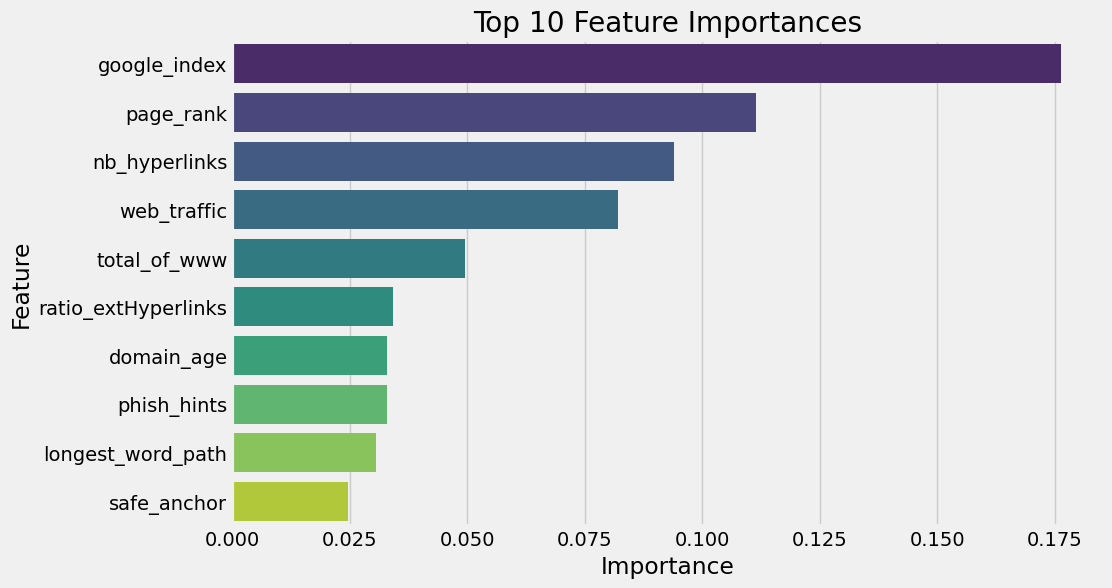

In [259]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = x_selected.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')

# Add title and labels
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [260]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']